# **Text-to-Image Generation using Stable Diffusion and Diffusers**

- diffusers is a hugging face page for using diffusion models from huggingface hub

```bash
!pip install diffusers transformers accelerate
```

## **1. Import Libraries**

In [41]:
# Import PyTorch for tensor computations and GPU acceleration
import torch

# Import StableDiffusionPipeline from the diffusers library for generating images using the Stable Diffusion model
from diffusers import StableDiffusionPipeline

# Import matplotlib for creating visualizations, such as displaying generated images
import matplotlib.pyplot as plt

## **2. Load the Models from HuggingFace**

In [42]:
# Specify the model IDs for the two different diffusion models to be used
model_id1 = "dreamlike-art/dreamlike-diffusion-1.0"  # First model ID
model_id2 = "stabilityai/stable-diffusion-xl-base-1.0"  # Second model ID

# Load the Stable Diffusion pipeline using the specified model ID
# Set the data type to float16 for reduced memory usage on GPU
# Enable the use of safetensors for safe loading of model weights
pipe = StableDiffusionPipeline.from_pretrained(model_id1, torch_dtype=torch.float16, use_safetensors=True)

# Move the pipeline to the GPU (CUDA) for faster image generation
pipe = pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

### **1. Define a Prompt for image generation**

In [43]:
prompt = """dreamlikeart, a grungy woman with rainbow hair, travelling between dimensions, dynamic pose, happy, soft eyes and narrow chin,
extreme bokeh, dainty figure, long hair straight down, torn kawaii shirt and baggy jeans
"""

In [44]:
# Generate an image based on the provided prompt using the Stable Diffusion pipeline
# The 'pipe' object processes the prompt and returns a list of generated images
# Access the first image in the list (index 0)
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

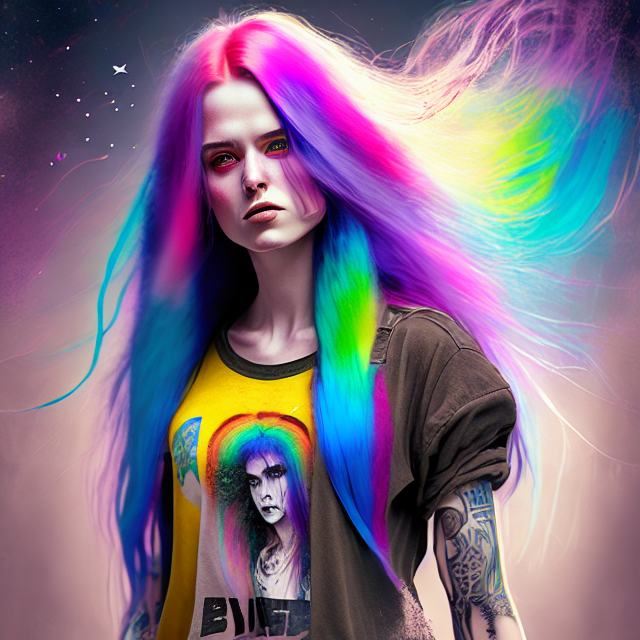

In [45]:
image # Show generated image

### **2. Define a Prompt for image generation**

In [46]:
# prompt2 = """A girl is sittig on a chair & She is accompanied by her tiger. Make sure to keep it cinematic and color to be golden iris
# """
prompt2 = """A young girl with long, flowing hair sits gracefully on an ornate wooden chair in a sunlit room. Beside her, a majestic tiger lounges comfortably, its fur glowing in the warm, golden light. The scene should evoke a cinematic feel, with soft focus and a dreamy background that enhances the golden hues of the iris. Capture the bond between the girl and the tiger, showcasing their serene expressions and the intricate details of the room's decor, such as rich fabrics and delicate patterns."""

image= pipe(prompt2).images[0]

Token indices sequence length is longer than the specified maximum sequence length for this model (101 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["tiger, showcasing their serene expressions and the intricate details of the room's decor, such as rich fabrics and delicate patterns."]


  0%|          | 0/50 [00:00<?, ?it/s]

[PROMPT]:  A young girl with long, flowing hair sits gracefully on an ornate wooden chair in a sunlit room. Beside her, a majestic tiger lounges comfortably, its fur glowing in the warm, golden light. The scene should evoke a cinematic feel, with soft focus and a dreamy background that enhances the golden hues of the iris. Capture the bond between the girl and the tiger, showcasing their serene expressions and the intricate details of the room's decor, such as rich fabrics and delicate patterns.


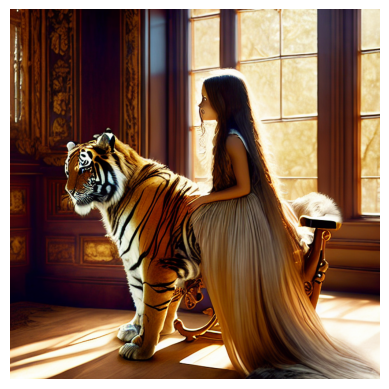

In [47]:
print('[PROMPT]: ',prompt2)
plt.imshow(image);
plt.axis('off');


----

## **Working with Stable Diffusion parameters**

- Negative prompting
- num_inference_steps
- height
- weight
- num_images_per_prompt

-----

In [48]:
def generate_image(pipe, prompt, params):
  img = pipe(prompt, **params).images

  num_images = len(img)
  if num_images>1:
    fig, ax = plt.subplots(nrows=1, ncols=num_images)
    for i in range(num_images):
      ax[i].imshow(img[i]);
      ax[i].axis('off');

  else:
    fig = plt.figure()
    plt.imshow(img[0]);
    plt.axis('off');
  plt.tight_layout()


prompt = "dreamlike, beautiful girl playing the festival of colors, draped in traditional pakistani attire,throughing colors"

params = {}

  0%|          | 0/50 [00:00<?, ?it/s]

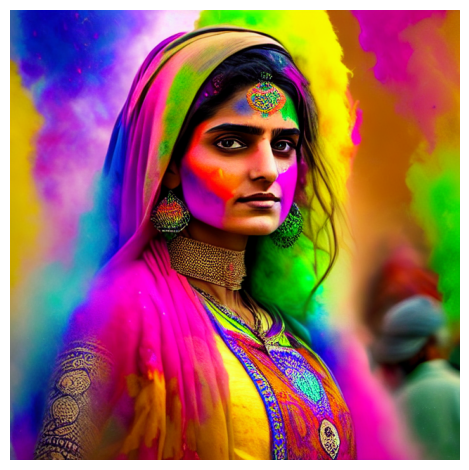

In [49]:
generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

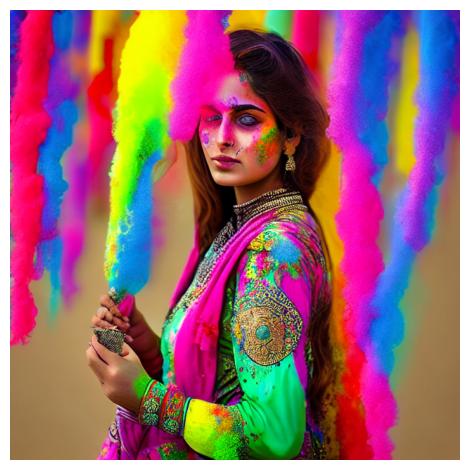

In [50]:
#num inference steps
params = {'num_inference_steps': 100}

generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

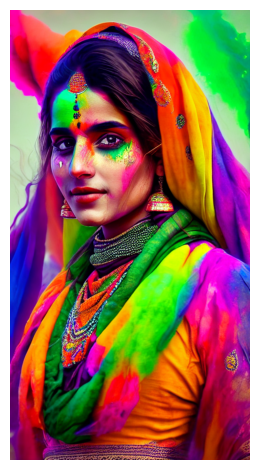

In [51]:
#height width
params = {'num_inference_steps': 100, 'width': 512, 'height': int(1.5*640)}

generate_image(pipe, prompt, params)

  0%|          | 0/100 [00:00<?, ?it/s]

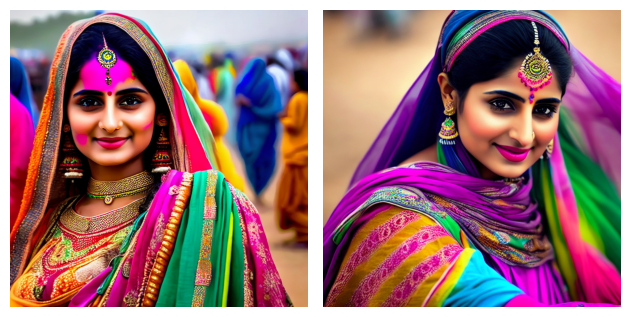

In [52]:

# negative_prompt
params = {'num_inference_steps': 100, 'num_images_per_prompt': 2, 'negative_prompt': 'ugly, distorted, low quality'}

generate_image(pipe, prompt, params)

------